In [1]:
import numpy as np
from hipster import SpectrumPlotter

wavelengths = np.linspace(200, 1000, 1000)
spectrum = (5 + np.sin(wavelengths * 0.1) ** 2) * np.exp(-0.00002 * (wavelengths - 600) ** 2)
spectrum_plotter = SpectrumPlotter(wavelengths, figsize_in_pixel=400)
plt = spectrum_plotter(spectrum)
plt

<Axes: >

In [ ]:
from hipster import Reconstruction

rg = Reconstruction("../tests/models/vae_decoder.onnx")
point = np.array([[0, 0.5, 0.5]], dtype=np.float32)
spectrum = rg(point)[0][0]
wavelengths = np.arange(336, 1023, 2)
spectrum_plotter = SpectrumPlotter(wavelengths, ylim=(0, 1), figsize_in_pixel=400)
plt = spectrum_plotter(spectrum)
plt

<Axes: >

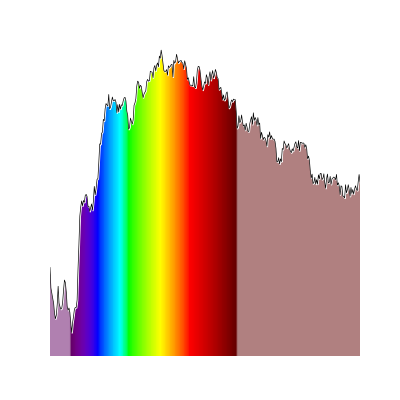

In [3]:
from PIL import Image

canvas = plt.figure.canvas
canvas.draw_idle()

# to_string_rgb is deprecated
# image_flat = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
# image = image_flat.reshape(*reversed(canvas.get_width_height()), 4)

image_flat = np.frombuffer(canvas.tostring_argb(), dtype='uint8')
image = image_flat.reshape(*reversed(canvas.get_width_height()), 4)[:,:,1:4]

image = Image.fromarray(image)
image

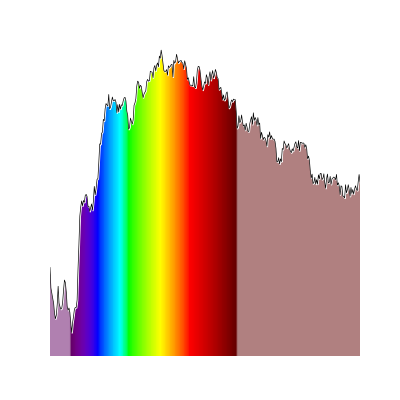

In [4]:
spectrum_plotter = SpectrumPlotter(wavelengths, ylim=(0, 1), figsize_in_pixel=400)
image = spectrum_plotter(spectrum)
image = Image.fromarray(image)
image
# image.save("test.jpg")

In [5]:
import pandas as pd

file = "/home/doserbd/data/gaia/xp_sampled_mean_spectrum/csv/XpSampledMeanSpectrum_000000-003111.csv.gz"
gaia_sampled = pd.read_csv(file, comment='#', nrows=1)

gaia_sampled["flux"] = gaia_sampled["flux"].apply(
        lambda x: np.fromstring(x[1:-1], dtype=np.float32, sep=",")
    )
flux = gaia_sampled["flux"][0]
wavelengths = np.arange(336, 1021, 2)
# flux = np.ones(len(wavelengths), dtype=np.float32)
# np.min(flux), np.max(flux)

In [6]:
from hipster import AbsorptionLinePlotter

plotter = AbsorptionLinePlotter(wavelengths, figsize_in_pixel=400)
image = plotter(flux)

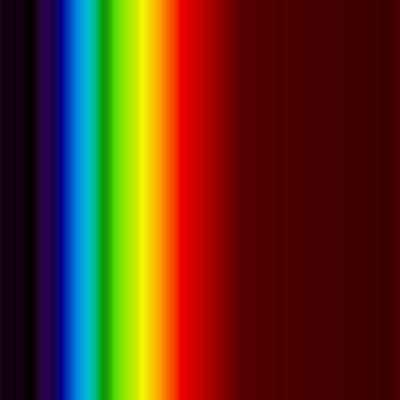

In [7]:
image = Image.fromarray(image)
image